In [1]:
import camelot.io as camelot
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

/tmp/ipykernel_10165/3908652470.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


## Extract Tables from PDF

In [2]:
pdf_file = 'data/hackathon_data.pdf'

In [3]:
tables = camelot.read_pdf(pdf_file, pages='all') # password='userpass' arg 
print("no of tables: ", len(tables))

no of tables:  11


In [4]:
table_df = None

for tab in tables:
    df = tab.df.copy()
    df.rename(df.iloc[0], axis=1, inplace=True)
    df.drop(0, axis='index', inplace=True)
    table_df = pd.concat([table_df, df], axis=0)
    

,Txn Date,Value\nDate,Description,Ref No./Cheque\nNo.,Debit,Credit,Balance
1,6 Jul 2022,6 Jul 2022 TO TRANSFER-,UPI/DR/218746086933/Mihir\nGr/PYTM/pay9662299/...,TRANSFER TO\n4692515162093,142.00,,"36,949.85"
2,7 Jul 2022,7 Jul 2022 TO TRANSFER-,UPI/DR/218839321204/Flipkart/\nPYTM/paytm-5650...,TRANSFER TO\n4692551162099,985.00,,"35,964.85"
3,8 Jul 2022,8 Jul 2022 TO TRANSFER-,UPI/DR/218959755815/ATOM\nTEC/ICIC/atomtech1@/...,TRANSFER TO\n5097916162098,"33,000.00",,"2,964.85"
4,8 Jul 2022,8 Jul 2022 BULK POSTING-ACHCr,HDFC02179000016677\nTATACHEMDIV202-,,,75.00,"3,039.85"
5,13 Jul 2022,13 Jul 2022 TO TRANSFER-,UPI/DR/219425653068/Mr\nTAJPA/FDRL/BHARATPE.9/...,TRANSFER TO\n4695969162094,100.00,,"2,939.85"
...,...,...,...,...,...,...,...
9,2 Jan 2023,2 Jan 2023 TO TRANSFER-,UPI/DR/300287544673/VISHW\nAKA/FDRL/9327046282...,TRANSFER TO\n4693843162091,"7,000.00",,"2,714.59"
10,3 Jan 2023,3 Jan 2023 TO TRANSFER-,UPI/DR/300367941911/AMAZO\nN S/HDFC/amazonsell...,TRANSFER TO\n4696835162099,369.00,,"2,345.59"
11,5 Jan 2023,5 Jan 2023 TO TRANSFER-,UPI/DR/300555770798/BUDDH\nSEN/ICIC/buddhsen1@...,TRANSFER TO\n4898874162090,664.00,,"1,681.59"
12,5 Jan 2023,5 Jan 2023 TO TRANSFER-,UPI/DR/337180428967/IRCTC\nWe/PYTM/paytm-6515/NA-,TRANSFER TO\n5097780162097,902.50,,779.09


### Text cleaning
- clean text from `\n`
- clean column `Value Date` and add to `Description`

In [5]:
# Replace \n to space
table_df.columns = [c.replace("\n", " ") for c in table_df.columns]
table_df_clean = table_df.replace(r'\n', ' ', regex=True)

In [6]:
# Value Date -> Description
date_regex = date_regex = r"\b(0?[1-9]|[12][0-9]|3[01])\s+(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+(\d{4})\b(.*)"

temp_df = table_df_clean['Value Date'].str.extract(date_regex, expand=True)
temp_df['date'] = temp_df[0].str.cat([temp_df[1], temp_df[2]], sep=' ')
table_df_clean["Value Date"] = temp_df['date']
table_df_clean['Description'] = temp_df[3].str.cat(table_df_clean['Description'], sep=' ')
del temp_df
table_df_clean

,Txn Date,Value Date,Description,Ref No./Cheque No.,Debit,Credit,Balance
1,6 Jul 2022,6 Jul 2022,TO TRANSFER- UPI/DR/218746086933/Mihir Gr/PYT...,TRANSFER TO 4692515162093,142.00,,"36,949.85"
2,7 Jul 2022,7 Jul 2022,TO TRANSFER- UPI/DR/218839321204/Flipkart/ PY...,TRANSFER TO 4692551162099,985.00,,"35,964.85"
3,8 Jul 2022,8 Jul 2022,TO TRANSFER- UPI/DR/218959755815/ATOM TEC/ICI...,TRANSFER TO 5097916162098,"33,000.00",,"2,964.85"
4,8 Jul 2022,8 Jul 2022,BULK POSTING-ACHCr HDFC02179000016677 TATACHE...,,,75.00,"3,039.85"
5,13 Jul 2022,13 Jul 2022,TO TRANSFER- UPI/DR/219425653068/Mr TAJPA/FDR...,TRANSFER TO 4695969162094,100.00,,"2,939.85"
...,...,...,...,...,...,...,...
9,2 Jan 2023,2 Jan 2023,TO TRANSFER- UPI/DR/300287544673/VISHW AKA/FD...,TRANSFER TO 4693843162091,"7,000.00",,"2,714.59"
10,3 Jan 2023,3 Jan 2023,TO TRANSFER- UPI/DR/300367941911/AMAZO N S/HD...,TRANSFER TO 4696835162099,369.00,,"2,345.59"
11,5 Jan 2023,5 Jan 2023,TO TRANSFER- UPI/DR/300555770798/BUDDH SEN/IC...,TRANSFER TO 4898874162090,664.00,,"1,681.59"
12,5 Jan 2023,5 Jan 2023,TO TRANSFER- UPI/DR/337180428967/IRCTC We/PYT...,TRANSFER TO 5097780162097,902.50,,779.09


In [7]:
table_df_clean['Txn Date'] = pd.to_datetime(table_df_clean['Txn Date'], infer_datetime_format=True)
table_df_clean['Value Date'] = pd.to_datetime(table_df_clean['Value Date'], infer_datetime_format=True)

In [8]:
table_df_clean

,Txn Date,Value Date,Description,Ref No./Cheque No.,Debit,Credit,Balance
1,2022-07-06,2022-07-06,TO TRANSFER- UPI/DR/218746086933/Mihir Gr/PYT...,TRANSFER TO 4692515162093,142.00,,"36,949.85"
2,2022-07-07,2022-07-07,TO TRANSFER- UPI/DR/218839321204/Flipkart/ PY...,TRANSFER TO 4692551162099,985.00,,"35,964.85"
3,2022-07-08,2022-07-08,TO TRANSFER- UPI/DR/218959755815/ATOM TEC/ICI...,TRANSFER TO 5097916162098,"33,000.00",,"2,964.85"
4,2022-07-08,2022-07-08,BULK POSTING-ACHCr HDFC02179000016677 TATACHE...,,,75.00,"3,039.85"
5,2022-07-13,2022-07-13,TO TRANSFER- UPI/DR/219425653068/Mr TAJPA/FDR...,TRANSFER TO 4695969162094,100.00,,"2,939.85"
...,...,...,...,...,...,...,...
9,2023-01-02,2023-01-02,TO TRANSFER- UPI/DR/300287544673/VISHW AKA/FD...,TRANSFER TO 4693843162091,"7,000.00",,"2,714.59"
10,2023-01-03,2023-01-03,TO TRANSFER- UPI/DR/300367941911/AMAZO N S/HD...,TRANSFER TO 4696835162099,369.00,,"2,345.59"
11,2023-01-05,2023-01-05,TO TRANSFER- UPI/DR/300555770798/BUDDH SEN/IC...,TRANSFER TO 4898874162090,664.00,,"1,681.59"
12,2023-01-05,2023-01-05,TO TRANSFER- UPI/DR/337180428967/IRCTC We/PYT...,TRANSFER TO 5097780162097,902.50,,779.09


In [9]:
# df = table_df_clean
# df.head()

In [10]:
table_df_clean.info() # Debit, Credit and Balance should be in double

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1 to 13
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Txn Date            236 non-null    datetime64[ns]
 1   Value Date          232 non-null    datetime64[ns]
 2   Description         232 non-null    object        
 3   Ref No./Cheque No.  236 non-null    object        
 4   Debit               236 non-null    object        
 5   Credit              236 non-null    object        
 6   Balance             236 non-null    object        
dtypes: datetime64[ns](2), object(5)
memory usage: 14.8+ KB


In [17]:
df[['Debit', 'Credit', 'Balance']] = df[['Debit', 'Credit', 'Balance']].replace(',','', regex=True)
df['Debit'] = pd.to_numeric(df['Debit'])
df['Credit'] = pd.to_numeric(df['Credit'])
df['Balance'] = pd.to_numeric(df['Balance'])
table_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1 to 13
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Txn Date            236 non-null    datetime64[ns]
 1   Value Date          232 non-null    datetime64[ns]
 2   Description         232 non-null    object        
 3   Ref No./Cheque No.  236 non-null    object        
 4   Debit               160 non-null    float64       
 5   Credit              76 non-null     float64       
 6   Balance             236 non-null    float64       
 7   Time                236 non-null    int64         
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 16.6+ KB


# Graphical Analysis

In [18]:
df = table_df_clean
df.head()

,Txn Date,Value Date,Description,Ref No./Cheque No.,Debit,Credit,Balance,Time
1,2022-07-06,2022-07-06,TO TRANSFER- UPI/DR/218746086933/Mihir Gr/PYT...,TRANSFER TO 4692515162093,142.0,NaN,36949.85,0
2,2022-07-07,2022-07-07,TO TRANSFER- UPI/DR/218839321204/Flipkart/ PY...,TRANSFER TO 4692551162099,985.0,NaN,35964.85,1
3,2022-07-08,2022-07-08,TO TRANSFER- UPI/DR/218959755815/ATOM TEC/ICI...,TRANSFER TO 5097916162098,33000.0,NaN,2964.85,2
4,2022-07-08,2022-07-08,BULK POSTING-ACHCr HDFC02179000016677 TATACHE...,,NaN,75.0,3039.85,3
5,2022-07-13,2022-07-13,TO TRANSFER- UPI/DR/219425653068/Mr TAJPA/FDR...,TRANSFER TO 4695969162094,100.0,NaN,2939.85,4


In [19]:
df['Time'] = np.arange(len(df['Txn Date']))
df.head()

,Txn Date,Value Date,Description,Ref No./Cheque No.,Debit,Credit,Balance,Time
1,2022-07-06,2022-07-06,TO TRANSFER- UPI/DR/218746086933/Mihir Gr/PYT...,TRANSFER TO 4692515162093,142.0,NaN,36949.85,0
2,2022-07-07,2022-07-07,TO TRANSFER- UPI/DR/218839321204/Flipkart/ PY...,TRANSFER TO 4692551162099,985.0,NaN,35964.85,1
3,2022-07-08,2022-07-08,TO TRANSFER- UPI/DR/218959755815/ATOM TEC/ICI...,TRANSFER TO 5097916162098,33000.0,NaN,2964.85,2
4,2022-07-08,2022-07-08,BULK POSTING-ACHCr HDFC02179000016677 TATACHE...,,NaN,75.0,3039.85,3
5,2022-07-13,2022-07-13,TO TRANSFER- UPI/DR/219425653068/Mr TAJPA/FDR...,TRANSFER TO 4695969162094,100.0,NaN,2939.85,4


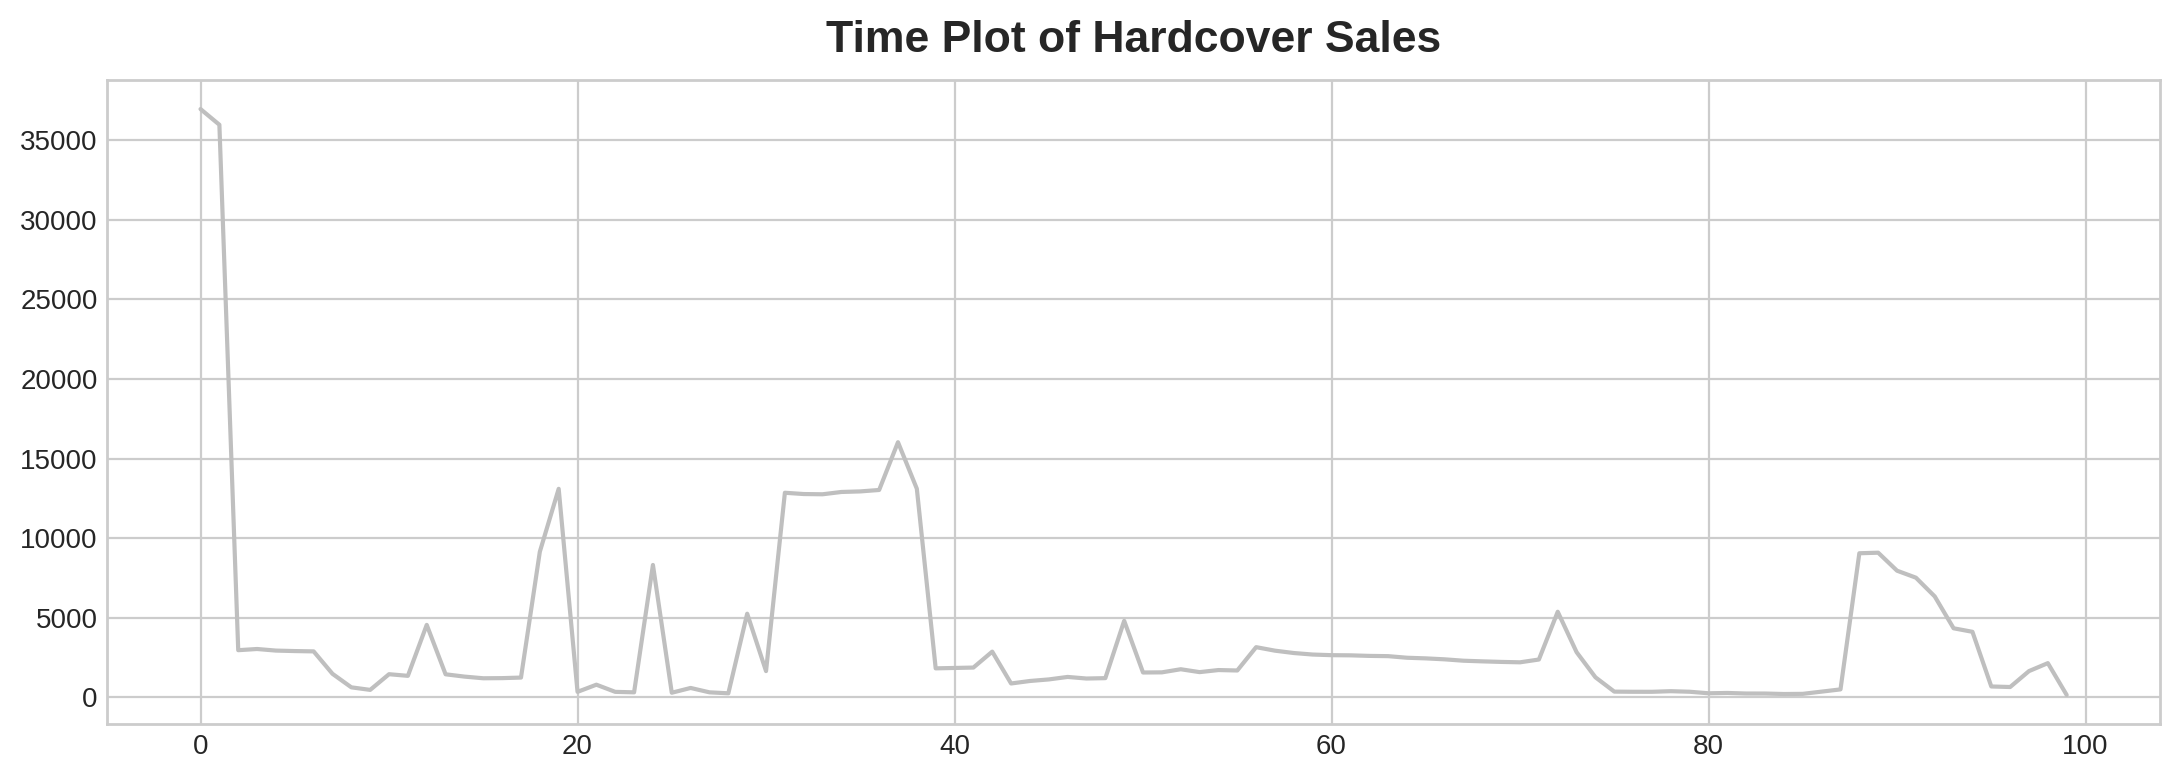

In [20]:
fig, ax = plt.subplots()
ax.plot('Time', 'Balance', data=df.iloc[:100], color='0.75')
# ax = sns.regplot(x='Time', y='Balance', data=table_df_clean, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

In [21]:
# month wise spending
df.groupby(df['Txn Date'].dt.month)['Debit'].sum()

Txn Date
1     13388.50
7     36798.00
8     44947.49
9     14597.50
10    12941.00
11    15577.36
12    14977.87
Name: Debit, dtype: float64

In [22]:
# Month wise income